In [1]:
import numpy as np
import pandas as pd
import os
import urllib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load MNIST dataset from 
# https://www.python-course.eu/data/mnist/
train = pd.read_csv('https://www.python-course.eu/data/mnist/mnist_train.csv',
                    header=None)
test = pd.read_csv('https://www.python-course.eu/data/mnist/mnist_test.csv',
                    header=None)

In [3]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train[0].value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: 0, dtype: int64

In [6]:
train_target = train[0]
train_image = train.drop([0], axis=1)
print(train_image.shape)

(60000, 784)


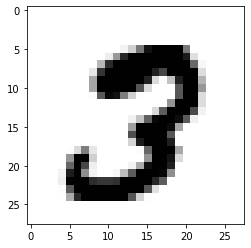

In [7]:
index = 12345
image = train_image.loc[index].to_numpy()
image = image.reshape([28, 28])
plt.imshow(image, cmap=matplotlib.cm.binary)

In [8]:
train_target[index]

3

In [9]:
def plot_digit(data):
    image = data.to_numpy().reshape([28, 28])
    plt.imshow(image,
               cmap=matplotlib.cm.binary)

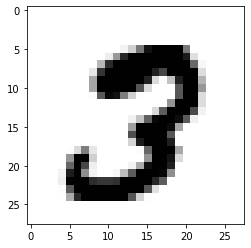

In [10]:
plot_digit(train_image.loc[12345])

In [11]:
def plot_digits(instances, images_per_row=10):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")

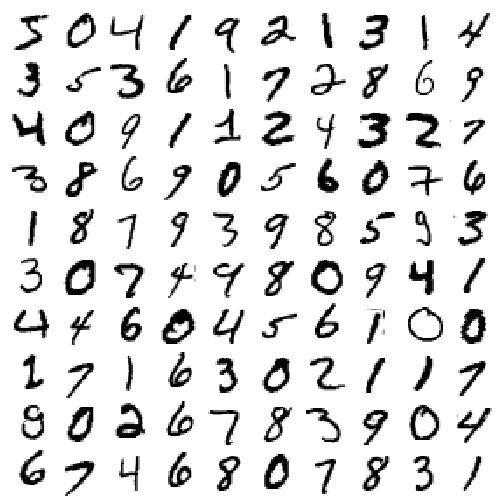

In [12]:
plt.figure(figsize=(9,9))
example_images = np.r_[train_image[:100]]
plot_digits(example_images, images_per_row=10)

## Binary Classifier
Before building a classifier that can detect all 10 classes, let's build a classifier to identify image 5.

In [13]:
train_target_5 = (train_target == 5)

In [14]:
# Transform test set
test_target = test[0]
test_image = test.drop([0], axis=1)
test_target_5 = (test_target == 5)

In [15]:
# Apply logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model.fit(train_image, train_target_5)

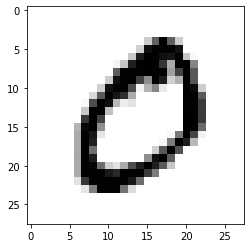

In [16]:
# Apply the model to predict for an image
index = 1
image = train_image.loc[[index]]
plot_digit(image)

In [ ]:
model.predict(image)

In [19]:
# What is the overall accuracy over the training set?
train_prediction = model.predict(train_image)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target_5, train_prediction)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(train_target_5, train_prediction)

In [ ]:
recall_score(train_target_5, train_prediction)

In [ ]:
# recall = the percentage of 5's that are currently identified.
4541 / (880 + 4541)

In [ ]:
# precision = the percentage of 5's among all instances that are predicted as true.
4541 / (420 + 4541)

In [ ]:
# There can be a case where precision is high but recall is low
# if the confusion matrix is:
# | ***, 10 |
# | 100, 50 |
# precision = 50 / (10 + 50) is close to 100%
# recall = 50 / (100 + 50) is not close to 100%

# if we switch 10 and 100, the model will have high recall but low precision

## Multiclass Classification

In [20]:
datasize = 3000
train_image_small = train_image[:datasize]
train_target_small = train_target[:datasize]
model2 = LogisticRegression(multi_class='ovr')
model2.fit(train_image_small, train_target_small)

/Users/cloudburst/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
train_prediction_small = model2.predict(train_image_small)
confusion_matrix(train_target_small, train_prediction_small)

In [ ]:
test_prediction = model2.predict(test_image)
matrix = confusion_matrix(test_target, test_prediction)

In [ ]:
plt.imshow(matrix,
          cmap=matplotlib.cm.binary)

In [ ]:
# remove diagonal numbers to emphasize the incorrect cases.
for k in range(10):
    matrix[k,k] = 0
plt.imshow(matrix, cmap=matplotlib.cm.binary)

## Data Augmentation

In [22]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape([28, 28])
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

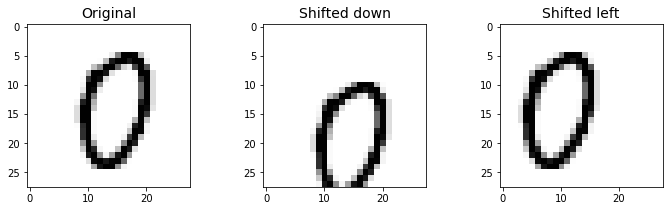

In [23]:
image = train_image.loc[1000].to_numpy()
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [29]:
train_image = train_image_small.to_numpy()
train_target = train_target_small.to_numpy()

In [30]:
train_image_augmented = [image for image in train_image]
train_target_augmented = [label for label in train_target]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(train_image, train_target):
        train_image_augmented.append(shift_image(image, dx, dy))
        train_target_augmented.append(label)

train_image_augmented = np.array(train_image_augmented)
train_target_augmented = np.array(train_target_augmented)

In [31]:
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(train_image_augmented))
train_image_augmented = train_image_augmented[shuffle_idx]
train_target_augmented = train_target_augmented[shuffle_idx]

In [28]:
# model3 = LogisticRegression(multi_class='ovr')
model3.fit(train_image_augmented, train_target_augmented)

In [ ]:
test_prediction = model3.predict(test_image)
confusion_matrix(test_target, test_prediction)

## Build a Neural Network Model Using Tensorflow.keras

Building the neural network requires **configuring the layers** of the model, then **compiling** the model.

**Configure the layers:**

- Use `keras.layers.Sequential()` to build the network. Specify its layers as a list. Layers may include:
- Use `keras.layers.Flatten()` as the input layer. Specify `input_shape`.
- Use `keras.layers.Dense()` as hidden layers. Specify layer size and use `tf.nn.relu` as activation function.
- Use `keras.layers.Dense()` as output layers. **What is the size of the output layer?** Use `tf.nn.softmax` as activation function.

In [33]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/2c/72/6b3264aa2889b7dde7663464b99587d95cd6a5f3b9b30181f14d78a63e64/tensorflow-2.0.0-cp37-cp37m-macosx_10_11_x86_64.whl
Processing /Users/cloudburst/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6/termcolor-1.1.0-cp37-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
     |████████████████████████████████| 1.4MB 5.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
Processing /Users/cloudburst/Library/Caches/pip/wheels/a7/15/a0/0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc/absl_

In [34]:
import tensorflow as tf
import tensorflow.keras as keras

In [35]:
model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Compile the model:** Specify the following parameters:

- `optimizer`: The method to minimize the loss function.
- `loss`: The loss function
- `metrics`: Measurement of model performance

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

- Feed the training data to the model—in this example, the train_images and train_labels arrays.
- The model learns to associate images and labels.
- We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

In [37]:
# use the fit() method to train the model. Specify epochs.
model.fit(train_image, train_target, epochs=5)

Train on 3000 samples
Epoch 1/5
3000/3000 [==============================] - 1s 457us/sample - loss: 10.7072 - accuracy: 0.6643
Epoch 2/5
3000/3000 [==============================] - 0s 102us/sample - loss: 2.2669 - accuracy: 0.8510
Epoch 3/5
3000/3000 [==============================] - 0s 124us/sample - loss: 1.1201 - accuracy: 0.8990
Epoch 4/5
3000/3000 [==============================] - 0s 139us/sample - loss: 0.7107 - accuracy: 0.9293
Epoch 5/5
3000/3000 [==============================] - 0s 101us/sample - loss: 0.4064 - accuracy: 0.9410


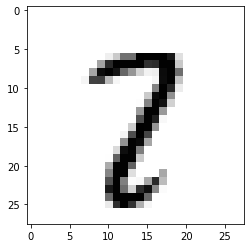

In [38]:
# Evaluate the model accuracy
ind = 321
image = test_image.loc[ind].to_numpy()
plt.imshow(image.reshape(28, 28), cmap=matplotlib.cm.binary)

In [42]:
# Make predictions
probs = model.predict(test_image.loc[ind].to_numpy())
probs